In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json

In [2]:
sns.set_context("notebook")
sns.set_style("dark")

In [3]:
with open("example-real-data.json", "rb") as f:
    old_raw_data = json.load(f)

## Loading raw data from analytics system

In [4]:
raw_data = []

for el in old_raw_data["data"]:
    # Value
    if "value" in el:
        el["value"] = float(el["value"])

    # Classes
    if "il" in el and "if" in el:
        el["i-faction-class"] = el["if"] + "-" + el["il"]
    if "tl" in el and "tf" in el:
        el["t-faction-class"] = el["tf"] + "-" + el["tl"]

    # Instigator coords
    if "ic" in el:
        el["ic_x"] = float(el["ic"].split(" ")[0].split("=")[1])
    if "ic" in el:
        el["ic_y"] = float(el["ic"].split(" ")[1].split("=")[1])

    # Target coords
    if "tc" in el:
        el["tc_x"] = float(el["tc"].split(" ")[0].split("=")[1])
    if "tc" in el:
        el["tc_y"] = float(el["tc"].split(" ")[1].split("=")[1])

    raw_data.append(el)

## Analyzing damage (per pawn, per class)

In [5]:
damage_df = pd.DataFrame([el for el in raw_data if el["Type"] == "Damage"])

In [6]:
damage_df

,value,i,t,ips,tps,il,tl,if,tf,ic,tc,Type,i-faction-class,t-faction-class,ic_x,ic_y,tc_x,tc_y
0,25.00,CH_2147134775,CH_2147134218,PS_2147356177,PS_2147357812,HboS,JpaS,CSM,LSM,X=3662.442 Y=-1812.495 Z=576.819,X=4322.271 Y=-14792.840 Z=4586.999,Damage,CSM-HboS,LSM-JpaS,3662.442,-1812.495,4322.271,-14792.840
1,25.00,CH_2147134775,CH_2147134218,PS_2147356177,PS_2147357812,HboS,JpaS,CSM,LSM,X=3662.442 Y=-1812.495 Z=576.819,X=4331.406 Y=-13166.893 Z=5736.147,Damage,CSM-HboS,LSM-JpaS,3662.442,-1812.495,4331.406,-13166.893
2,18.75,CH_2147134775,CH_2147134218,PS_2147356177,PS_2147357812,HboS,JpaS,CSM,LSM,X=3662.442 Y=-1812.495 Z=576.819,X=4303.241 Y=-12902.033 Z=5734.644,Damage,CSM-HboS,LSM-JpaS,3662.442,-1812.495,4303.241,-12902.033
3,18.75,CH_2147134775,CH_2147134218,PS_2147356177,PS_2147357812,HboS,JpaS,CSM,LSM,X=3662.442 Y=-1812.495 Z=576.819,X=4172.242 Y=-12278.284 Z=5474.807,Damage,CSM-HboS,LSM-JpaS,3662.442,-1812.495,4172.242,-12278.284
4,25.00,CH_2147134775,CH_2147134218,PS_2147356177,PS_2147357812,HboS,JpaS,CSM,LSM,X=3662.442 Y=-1812.495 Z=576.819,X=3325.511 Y=-10644.384 Z=3634.541,Damage,CSM-HboS,LSM-JpaS,3662.442,-1812.495,3325.511,-10644.384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,2.00,CH_2147001112,CH_2147001112,PS_2147357812,PS_2147357812,TacS,TacS,LSM,LSM,X=4911.684 Y=-17437.070 Z=1619.628,X=4911.684 Y=-17437.070 Z=1619.628,Damage,LSM-TacS,LSM-TacS,4911.684,-17437.070,4911.684,-17437.070
1796,18.75,CH_2147027930,CH_2147001112,PS_2147356171,PS_2147357812,HboS,TacS,CSM,LSM,X=6854.241 Y=-16780.170 Z=1516.506,X=4911.684 Y=-17437.070 Z=1619.628,Damage,CSM-HboS,LSM-TacS,6854.241,-16780.170,4911.684,-17437.070
1797,2.00,CH_2147001112,CH_2147001112,PS_2147357812,PS_2147357812,TacS,TacS,LSM,LSM,X=4911.684 Y=-17437.070 Z=1619.628,X=4911.684 Y=-17437.070 Z=1619.628,Damage,LSM-TacS,LSM-TacS,4911.684,-17437.070,4911.684,-17437.070
1798,2.00,CH_2147001112,CH_2147001112,PS_2147357812,PS_2147357812,TacS,TacS,LSM,LSM,X=4911.684 Y=-17437.070 Z=1619.628,X=4911.684 Y=-17437.070 Z=1619.628,Damage,LSM-TacS,LSM-TacS,4911.684,-17437.070,4911.684,-17437.070


In [9]:
# damage_df["value"] = pd.to_numeric(damage_df["value"])
damage_per_pawn = damage_df.groupby(["i"]).agg(
    damage_per_life=('value', 'sum'),
    loadout=('i-faction-class', 'first')
)
damage_per_pawn

,damage_per_life,loadout
i,,
CH_2147001112,496.147347,LSM-TacS
CH_2147014524,59.000000,LSM-TacS
CH_2147015591,29.000000,LSM-JpaS
CH_2147021145,225.000000,LSM-TacS
CH_2147023329,509.000000,LSM-TacS
CH_2147024287,196.000000,LSM-TacVP
CH_2147024632,241.500000,LSM-TacS
CH_2147027317,502.000000,LSM-TacVP
CH_2147027584,266.000000,LSM-TacS


In [10]:
damage_per_life_for_classes = damage_per_pawn.groupby("loadout").agg(
    mean_damage_per_life=('damage_per_life', 'mean'),
    std_damage_per_life=('damage_per_life', 'std')
)
damage_per_life_for_classes

,mean_damage_per_life,std_damage_per_life
loadout,,
CSM-AucV,588.614746,NaN
CSM-HboS,1220.358335,1194.363263
CSM-MelS,120.000000,NaN
CSM-PcaS,500.733784,688.345519
CSM-SupS,110.500000,142.128463
CSM-TacS,718.692772,502.460655
CSM-TacVP,2512.000000,NaN
LSM-AucV,748.071910,NaN
LSM-JpaS,151.170584,169.838458


<Axes: title={'center': 'damage_per_life'}, ylabel='[loadout]'>

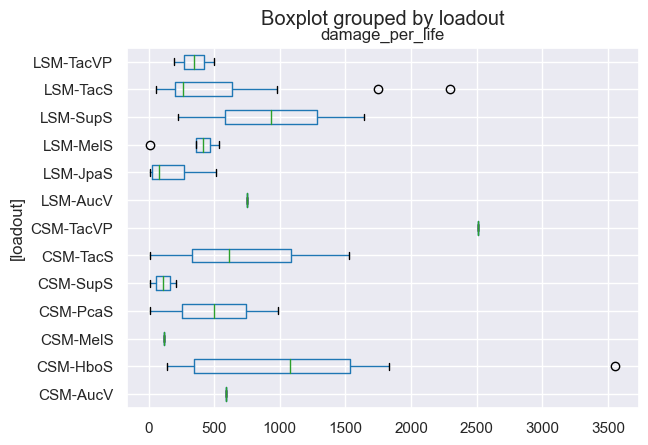

In [45]:
damage_per_pawn.boxplot(by="loadout", vert=False)
# sns.violinplot(damage_per_pawn, x="damage_per_life", y="loadout")

## Analyzing XP (per pawn, per class and action)

In [70]:
xp_df = pd.DataFrame([el for el in raw_data if el["Type"] == "XP"])
xp_df.head()

,t,value,tps,tf,tl,tc,action,Type,t-faction-class,tc_x,tc_y
0,CH_2147134775,-9.0,PS_2147356177,CSM,HboS,X=3931.529 Y=-3229.127 Z=562.379,Friendly fire,XP,CSM-HboS,3931.529,-3229.127
1,CH_2147134775,-9.0,PS_2147356177,CSM,HboS,X=3934.615 Y=-3260.164 Z=562.071,Friendly fire,XP,CSM-HboS,3934.615,-3260.164
2,CH_2147134775,100.0,PS_2147356177,CSM,HboS,X=3311.294 Y=-3861.349 Z=557.272,Enemy down,XP,CSM-HboS,3311.294,-3861.349
3,CH_2147132684,50.0,PS_2147363049,CSM,MelS,X=2637.360 Y=-4574.720 Z=566.180,Enemy finished,XP,CSM-MelS,2637.360,-4574.720
4,CH_2147135180,-8.0,PS_2147341030,LSM,TacS,X=3573.575 Y=-5894.738 Z=571.737,Friendly fire,XP,LSM-TacS,3573.575,-5894.738


In [23]:
xp_per_pawn = xp_df.groupby(["t", "action"]).agg(
    xp_per_life=('value', 'sum'),
    loadout=('t-faction-class', 'first')
)

In [71]:
xp_per_pawn.head()

xp_per_life    loadout
t             action                                 
CH_2147001112 Ally finished         -100.0   LSM-TacS
              Enemy down             100.0   LSM-TacS
              Friendly fire          -98.0   LSM-TacS
CH_2147024287 Started capture        400.0  LSM-TacVP
CH_2147027317 Elite down             200.0  LSM-TacVP

In [72]:
xp_per_life_for_class_and_action = xp_per_pawn.groupby(["loadout", "action"]).agg(
    mean_xp_per_life=('xp_per_life', 'mean'),
    std_xp_per_life=('xp_per_life', 'std')
)
xp_per_life_for_class_and_action.head()

mean_xp_per_life  std_xp_per_life
loadout  action                                            
CSM-AucV Enemy down             100.000000              NaN
         Enemy finished          50.000000              NaN
CSM-HboS Ally revived           150.000000         0.000000
         Assist                 133.333333        57.735027
         Capture stopped        400.000000         0.000000

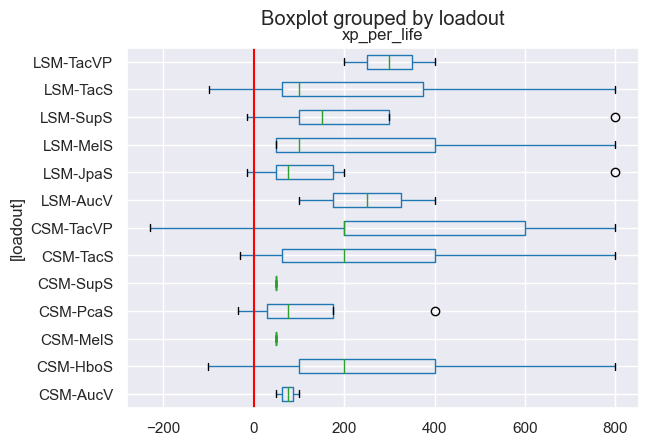

In [40]:
xp_per_pawn.boxplot(by='loadout', vert=False)

plt.axvline(x=0, color='red')
plt.show()

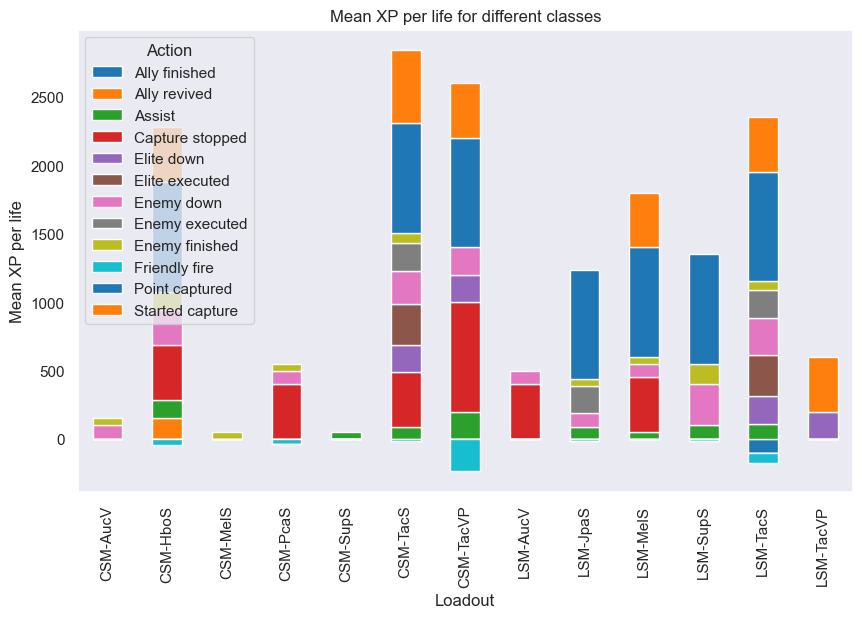

In [31]:
# Create a pivot table to reshape the data for plotting

pivot_xp_per_life_for_class_and_action = xp_per_life_for_class_and_action.reset_index()
pivot_xp_per_life_for_class_and_action = pivot_xp_per_life_for_class_and_action.pivot(index='loadout', columns='action', values='mean_xp_per_life')

# Create a stacked barplot
ax = pivot_xp_per_life_for_class_and_action.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot
plt.title('Mean XP per life for different classes')
plt.xlabel('Loadout')
plt.ylabel('Mean XP per life')
plt.legend(title='Action')

# Show the plot
plt.show()

## Analyzing KD ratios

In [73]:
kills_df = xp_df[xp_df["action"] == "Enemy down"]
kills_df.head()

,t,value,tps,tf,tl,tc,action,Type,t-faction-class,tc_x,tc_y
2,CH_2147134775,100.0,PS_2147356177,CSM,HboS,X=3311.294 Y=-3861.349 Z=557.272,Enemy down,XP,CSM-HboS,3311.294,-3861.349
10,CH_2147135180,100.0,PS_2147341030,LSM,TacS,X=2607.944 Y=-4692.424 Z=559.423,Enemy down,XP,LSM-TacS,2607.944,-4692.424
19,CH_2147134775,100.0,PS_2147356177,CSM,HboS,X=2995.717 Y=-1650.286 Z=564.645,Enemy down,XP,CSM-HboS,2995.717,-1650.286
24,CH_2147135627,100.0,PS_2147479719,LSM,SupS,X=2644.536 Y=-1597.006 Z=575.960,Enemy down,XP,LSM-SupS,2644.536,-1597.006
30,CH_2147135627,100.0,PS_2147479719,LSM,SupS,X=1843.676 Y=-2563.125 Z=577.591,Enemy down,XP,LSM-SupS,1843.676,-2563.125


In [74]:
kills_per_pawn = kills_df.groupby(["t"]).agg(
    kill_count=('t', 'count'),
    loadout=('t-faction-class', 'first')
)
kills_per_pawn.head()

,kill_count,loadout
t,,
CH_2147001112,1,LSM-TacS
CH_2147027930,2,CSM-HboS
CH_2147033515,3,CSM-TacS
CH_2147039266,1,LSM-TacS
CH_2147039586,1,LSM-MelS


In [75]:
kills_per_life_for_classes = kills_per_pawn.groupby("loadout").agg(
    mean_kills_per_life=('kill_count', 'mean'),
    std_kills_per_life=('kill_count', 'std')
)
kills_per_life_for_classes.head()

,mean_kills_per_life,std_kills_per_life
loadout,,
CSM-AucV,1.000000,NaN
CSM-HboS,2.600000,1.949359
CSM-PcaS,1.000000,NaN
CSM-TacS,2.428571,1.272418
CSM-TacVP,2.000000,NaN


<Axes: title={'center': 'kill_count'}, ylabel='[loadout]'>

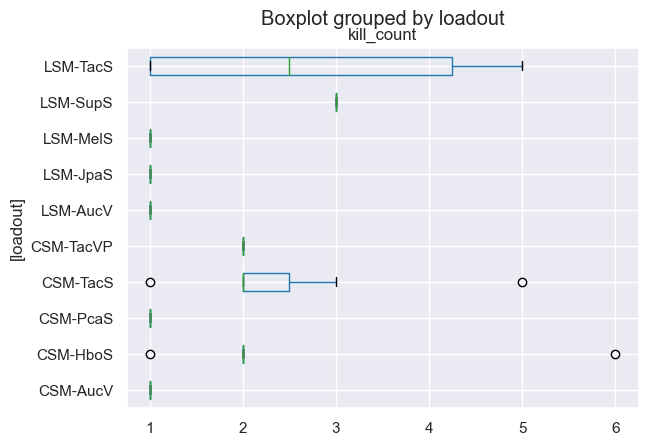

In [55]:
kills_per_pawn.boxplot(by="loadout", vert=False)
# sns.violinplot(kills_per_pawn, x="kill_count", y="loadout")

## Analyzing class frequencies

In [64]:
spawn_df = pd.DataFrame([el for el in raw_data if el["Type"] == "Spawn"])

In [65]:
class_spawns = spawn_df["t-faction-class"].value_counts()

In [76]:
class_spawns.head()

t-faction-class
LSM-TacS    38
LSM-SupS    25
Name: count, dtype: int64

<Axes: title={'center': 'Classes spawn frequency'}, xlabel='t-faction-class'>

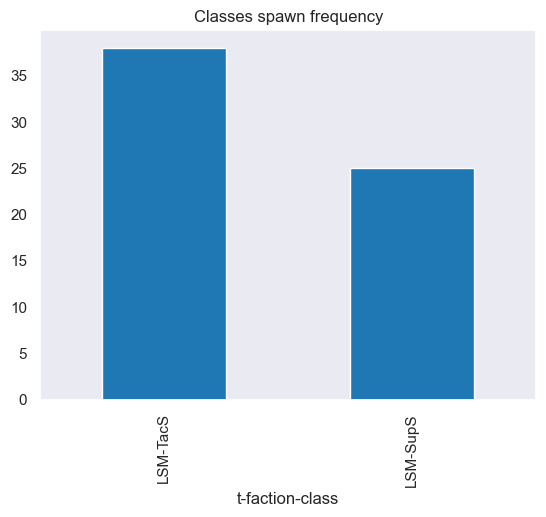

In [67]:
# Obviously game logging error
class_spawns.plot(kind='bar', title="Classes spawn frequency")

## Heatmaps

### Damage dealers

In [68]:
x_points = list(damage_df["ic_x"])
y_points = list(damage_df["ic_y"])

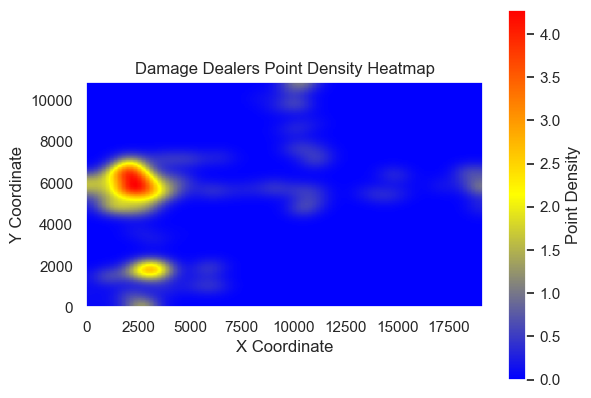

In [83]:
from matplotlib.colors import LinearSegmentedColormap

# Create a 2D histogram to represent point density
heatmap, xedges, yedges = np.histogram2d(x_points, y_points, bins=100)

# Smooth the heatmap using Gaussian convolution
from scipy.ndimage import gaussian_filter
heatmap = gaussian_filter(heatmap, sigma=3)

# Define a custom colormap (blue, yellow, red)
colors = [(0, 'blue'), (0.5, 'yellow'), (1, 'red')]
custom_cmap = LinearSegmentedColormap.from_list('custom', colors)

# Create the heatmap plot
plt.imshow(heatmap.T, origin='lower', extent=[0, xedges.max(), 0, yedges.max()], cmap=custom_cmap)
plt.colorbar(label='Point Density')  # Add a colorbar for reference
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Damage Dealers Point Density Heatmap')

plt.show()